In [310]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf

# Define the labels
labels = ['label_A', 'label_B', 'label_C', 'label_D', 'label_E']

# Define some example words to build sentences
words = [
    "algorithm", "biology", "neural", "protein", "derivative", "matrix", "social", "theorem", "integration", "gravity",
    "tourism", "planet", "cell", "equation", "forest", "migration", "communication", "climate", "DNA", "evolution",
    "justice", "law", "marketing", "sales", "philosophy", "tourist", "hotel", "reservation", "restaurant", "cuisine",
    "culture", "museum", "aviation", "passport", "map", "ocean", "currency", "chef", "recipe", "ingredient", "airport",
    "flight", "baggage", "explore", "adventure", "reservation", "population", "government", "democracy", "community",
    "leader", "society", "family", "friendship", "travel", "vacation", "beach", "mountain", "city", "village", "wildlife",
    "safari", "tiger", "elephant", "lion", "zebra", "giraffe", "habitat", "endangered", "conservation", "sustainability",
    "renewable", "ecosystem", "rainforest", "savanna", "desert", "species", "biodiversity", "fish", "shark", "whale",
    "dolphin", "coral", "reef", "crustacean", "mammal", "reptile", "amphibian", "insect", "butterfly", "spider", "bird",
    "eagle", "penguin", "hawk", "sparrow", "canary", "pelican", "seagull", "shark", "cat", "dog", "cow", "chicken", "pig",
    "horse", "sheep", "goat", "rabbit", "squirrel", "wolf", "fox", "bear", "beaver", "otter", "snake", "lizard", "gecko",
    "iguana", "frog", "turtle", "crocodile", "alligator", "fish", "trout", "salmon", "carp", "pike", "bass", "sardine",
    "tuna", "herring", "cod", "mackerel", "oyster", "clam", "scallop", "lobster", "crab", "shrimp", "prawn", "squid",
    "octopus", "jellyfish", "plankton", "algae", "kelp", "seaweed", "fungi", "bacteria", "virus", "microbe", "yeast",
    "molecule", "atom", "electron", "proton", "neutron", "quark", "particle", "wave", "quantum", "photon", "nucleus",
    "isotope", "energy", "force", "velocity", "momentum", "acceleration", "inertia", "friction", "gravity", "force",
    "pressure", "temperature", "volume", "density", "mass", "weight", "light", "sound", "radiation", "magnetism", "electricity",
    "current", "voltage", "resistance", "circuit", "capacitor", "inductor", "diode", "transistor", "semiconductor", "computer",
    "processor", "memory", "hard", "disk", "drive", "byte", "bit", "gigabyte", "terabyte", "network", "internet", "protocol",
    "bandwidth", "latency", "firewall", "encryption", "algorithm", "database", "query", "server", "client", "cloud", "storage",
    "virtualization", "container", "docker", "kubernetes", "machine", "learning", "AI", "artificial", "intelligence", "deep",
    "neural", "network", "supervised", "unsupervised", "reinforcement", "learning", "training", "testing", "dataset", "classification",
    "regression", "prediction", "pattern", "recognition", "speech", "vision", "image", "processing", "text", "analysis", "natural",
    "language", "processing", "tokenization", "embedding", "vector", "classification", "sentiment", "detection", "spam", "filtering",
    "syntax", "semantics", "morphology", "phonetics", "grammar", "syntax", "lexicon", "corpus", "dataset", "annotation", "ground",
    "truth", "speech", "recognition", "speech", "synthesis", "chatbot", "virtual", "assistant", "translation", "transcription",
    "biomechanics", "kinetics", "motion", "dynamics", "forces", "torque", "pressure", "tension", "compression", "strain", "deformation",
    "friction", "lubrication", "turbulence", "viscosity", "elasticity", "plasticity", "resilience", "fatigue", "fracture", "failure",
    "impact", "collision", "vibration", "oscillation", "wave", "propagation", "sound", "acoustics", "auditory", "hearing", "speech",
    "noise", "environment", "pollution", "greenhouse", "emission", "ozone", "atmosphere", "weather", "climate", "temperature", "humidity",
    "precipitation", "wind", "hurricane", "storm", "flood", "drought", "lightning", "thunder", "earthquake", "volcano", "erosion",
    "sedimentation", "glacier", "river", "lake", "ocean", "seabed", "water", "cycle", "rain", "snow", "hail", "fog", "mist", "dew",
    "biology", "cell", "organism", "gene", "chromosome", "mutation", "adaptation", "species", "genus", "family", "order", "class",
    "phylum", "kingdom", "ecosystem", "habitat", "niche", "symbiosis", "parasitism", "mutualism", "commensalism", "predator", "prey",
    "scavenger", "decomposer", "fungus", "bacterium", "protozoan", "algae", "virus", "microbe", "antibiotic", "vaccine", "immunity",
    "disease", "infection", "pandemic", "epidemic", "symptom", "treatment", "cure", "diagnosis", "prognosis", "recovery", "pain",
    "fever", "inflammation", "infection", "immune", "system", "antigen", "antibody", "vaccination", "prevention", "nutrition", "diet",
    "protein", "carbohydrate", "fat", "vitamin", "mineral", "water", "hydration", "fiber", "digestion", "metabolism", "calorie", "exercise",
    "muscle", "bone", "joint", "ligament", "tendon", "cartilage", "nervous", "system", "neuron", "synapse", "axon", "dendrite", "reflex",
    "hormone", "endocrine", "gland", "adrenaline", "insulin", "cortisol", "serotonin", "dopamine", "oxytocin", "memory", "cognition",
    "consciousness", "emotion", "perception", "sensation", "attention", "thought", "idea", "concept", "belief", "value", "morality",
    "ethics", "decision", "choice", "behavior", "action", "habit", "intelligence", "learning", "knowledge", "wisdom", "understanding",
    "insight", "foresight", "creativity", "imagination", "art", "music", "painting", "sculpture", "literature", "poetry", "drama",
    "theater", "dance", "performance", "cinema", "photography", "film", "director", "actor", "character", "plot", "scene", "narrative",
    "novel", "story", "poem", "rhyme", "rhythm", "melody", "harmony", "instrument", "song", "voice", "chorus", "composer", "musician",
    "band", "orchestra", "conductor", "performance", "concert", "festival", "stage", "audience", "ticket", "artwork", "gallery",
    "exhibition", "museum", "painting", "sculpture", "installation", "drawing", "sketch", "ceramics", "pottery", "textile", "fashion",
    "design", "style", "aesthetic", "trend", "brand", "marketing", "advertising", "promotion", "campaign", "product", "consumer",
    "market", "economy", "finance", "investment", "bank", "loan", "interest", "mortgage", "stock", "bond", "share", "dividend",
    "profit", "loss", "revenue", "income", "expense", "budget", "tax", "debt", "credit", "payment", "currency", "exchange", "inflation",
    "deflation", "trade", "export", "import", "tariff", "quota", "subsidy", "regulation", "policy", "law", "justice", "court", "trial",
    "jury", "judge", "lawyer", "contract", "agreement", "negotiation", "dispute", "resolution", "settlement", "arbitration", "mediation",
    "algorithmic", "bioinformatics", "neuron", "proteomics", "derive", "deriving", "matrices", "socialize", "socializing", 
    "theoretical", "integrate", "integrating", "gravitational", "tourist", "planetary", "cellular", "equational", "forested",
    "migratory", "communicate", "communicating", "climatic", "genetics", "evolutionary", "just", "lawful", "market", "sale", 
    "philosophical", "touristic", "hotelier", "book", "booking", "cook", "culinary", "cultural", "museological", "fly", 
    "aviator", "passporting", "mapping", "oceanic", "currencies", "chefing", "recipebook", "recipewriting", "ingredientlist", 
    "airporter", "flightless", "baggages", "explorer", "adventurous", "populating", "governmental", "democratic", 
    "community-driven", "leadership", "societal", "familial", "friend", "friendly", "traveling", "vacationing", "beachside", 
    "mountainous", "urban", "villager", "wild", "safariing", "striped", "elephantine", "lionesque", "zebra-striped", "giraffelike", 
    "habitats", "endanger", "conservational", "sustainable", "renew", "ecosystems", "rainforests", "savannah", "desertic", 
    "species-wide", "biodiverse", "fishing", "sharks", "whales", "dolphins", "corals", "reefs", "crustaceans", "mammalian", 
    "reptilian", "amphibious", "insects", "butterflies", "spiders", "birds", "eagled", "penguins", "hawked", "sparrows", 
    "canaries", "pelicans", "seagulls", "sharked", "cats", "dogs", "cattle", "chickens", "pigs", "horses", "sheeps", "goats", 
    "rabbits", "squirrels", "wolves", "foxes", "bears", "beavers", "otters", "snakes", "lizards", "geckos", "iguanas", "frogs", 
    "turtles", "crocodiles", "alligators", "fishers", "trouts", "salmons", "carps", "pikes", "basses", "sardines", "tunas", 
    "herrings", "cods", "mackerels", "oysters", "clams", "scallops", "lobsters", "crabs", "shrimps", "prawns", "squids", 
    "octopi", "jellyfishes", "planktons", "algal", "kelps", "seaweeds", "fungal", "bacterias", "viruses", "microbes", "yeasts", 
    "molecular", "atomic", "electronic", "protons", "neutrons", "quarks", "particulate", "waves", "quantum-based", "photons", 
    "nuclear", "isotopic", "energized", "velocity-based", "momentous", "accelerated", "inertial", "frictive", "gravitational-force", 
    "pressurized", "temperature-based", "volumetric", "densities", "massive", "weighted", "light-based", "sound-based", 
    "radiative", "magnetic", "electrically", "current-based", "voltaged", "resistive", "circuits", "capacitive", "inductive", 
    "diodes", "transistors", "semiconducting", "computational", "processor-based", "memory-based", "hard-drived", "disk-based", 
    "byte-sized", "bit-sized", "gigabytes", "terabytes", "networked", "internet-based", "protocol-driven", "bandwidth-based", 
    "latency-optimized", "firewalled", "encrypted", "algorithmically", "database-driven", "queried", "server-sided", "client-sided", 
    "cloud-computing", "storage-based", "virtualized", "containerized", "dockerized", "kubernetes-driven", "machine-learned", 
    "artificially", "deep-learned", "networked-neurons", "supervised-learning", "unsupervised-learning", "reinforced-learning", 
    "training-based", "testing-based", "dataset-based", "classification-based", "regressive", "predictive", "pattern-recognition", 
    "speech-recognition", "vision-based", "image-processing", "text-based", "analysis-driven", "natural-language", "tokenized", 
    "vectorized", "classification-labeled", "sentiment-analyzed", "spam-filtered", "syntaxed", "semantic-based", "morphed", 
    "phonetic-analysis", "grammar-driven", "lexical", "corpused", "annotated", "ground-truthed", "speech-synthesized", "chatbot-based", 
    "virtually-assistant", "translated", "transcribed"
]



# Generate multilabel samples
samples = []
num_samples = 100

for _ in range(num_samples):
    # Randomly choose a sentence length between 10 and 100 words
    text_length = random.randint(100, 400)
    text = " ".join(random.choices(words, k=text_length))
    samples.append(text)

# Create a DataFrame with texts and one-hot encoded labels
df = pd.DataFrame(samples, columns=['Text'])
for lb in labels:
    df[lb] = np.random.randint(0, 2, size=(num_samples,))
        
# One-hot encode the labels
# for label in labels:
#     df[label] = df['Labels'].apply(lambda x: 1 if label in x else 0)

# Drop the 'Labels' column (optional)
# df = df.drop(columns=['Labels'])
df.head()

,Text,label_A,label_B,label_C,label_D,label_E
0,social current-based zebra-striped radiation d...,0,1,0,1,0
1,bit-sized prognosis passporting rhyme networke...,0,0,0,1,1
2,dog plankton vision-based hawked endocrine sce...,0,0,1,0,0
3,resistive socialize atom spam story microbes s...,0,0,1,0,1
4,belief book behavior carp grammar annotated el...,0,1,1,1,1


In [311]:
# Get all columns that start with 'tags.'
tag_columns = [col for col in df.columns if col.startswith('label')]
print('tag_columns:', tag_columns)
print('tag_columns count:', len(tag_columns))
# Get the dataframe data in those columns
tags_df = df[tag_columns]
tags_df.head()

tag_columns: ['label_A', 'label_B', 'label_C', 'label_D', 'label_E']
tag_columns count: 5


,label_A,label_B,label_C,label_D,label_E
0,0,1,0,1,0
1,0,0,0,1,1
2,0,0,1,0,0
3,0,0,1,0,1
4,0,1,1,1,1


In [312]:
y_data = tags_df.values
y_data.shape

(100, 5)

In [313]:
wordbag = set()
statements = df['Text'].apply(str.lower)

for st in statements:
    wordbag.update(set(st.split()))
len(wordbag)

794

In [314]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

word2idx = {word: i + 1 for i, word in enumerate(wordbag)}

x_data = [[word2idx[word] for word in st.split()] for st in statements]

x_data = pad_sequences(x_data, padding='post')
x_data

array([[504, 142, 568, ...,   0,   0,   0],
       [264, 787,  22, ...,   0,   0,   0],
       [337, 147, 605, ...,   0,   0,   0],
       ...,
       [273, 610,  56, ...,   0,   0,   0],
       [286, 600, 732, ...,   0,   0,   0],
       [103, 658, 598, ...,   0,   0,   0]])

In [315]:
x_data.shape

(100, 397)

In [316]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=None, test_size=0.2, random_state=24)

In [317]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((80, 397), (80, 5), (20, 397), (20, 5))

In [379]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SimpleRNN, Dropout, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

output_size = y_train.shape[1]
embedding_size = 1000

model = Sequential()
model.add(Embedding(len(wordbag)+1, embedding_size, input_shape=(x_train.shape[1],)))
model.add(Conv1D(32, 5, strides=1, activation='relu', padding='same'))
model.add(MaxPooling1D(5))
# model.add(Conv1D(64, 5, activation='relu', padding='same'))
# model.add(MaxPooling1D(3))
model.add(Bidirectional(LSTM(256, recurrent_dropout=0.5, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Conv1D(16, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.5, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.5)))
# model.add(Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
# model.add(LSTM(200))

# model.add(Dense(32))
# model.add(Dropout(0.4))
model.add(Dense(output_size, activation='sigmoid'))

# optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['binary_accuracy'])
model.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_55 (Embedding)        │ (None, 397, 1000)      │       795,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_66 (Conv1D)              │ (None, 397, 32)        │       160,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_65 (MaxPooling1D) │ (None, 79, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_57                │ (None, 79, 512)        │       591,872 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 79, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_67 (Conv1D)              │ (None, 79, 16)         │        40,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_66 (MaxPooling1D) │ (None, 15, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_58                │ (None, 15, 256)        │       148,480 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 15, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_59                │ (None, 128)            │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,901,357 (7.25 MB)

 Trainable params: 1,901,357 (7.25 MB)

 Non-trainable params: 0 (0.00 B)

In [380]:
history=model.fit(x_train,y_train,epochs=50,verbose=2, validation_data=(x_test, y_test))

Epoch 1/50
3/3 - 16s - 5s/step - binary_accuracy: 0.5225 - loss: 0.6939 - val_binary_accuracy: 0.5200 - val_loss: 0.6914
Epoch 2/50
3/3 - 2s - 507ms/step - binary_accuracy: 0.5200 - loss: 0.6925 - val_binary_accuracy: 0.5200 - val_loss: 0.6894
Epoch 3/50
3/3 - 2s - 542ms/step - binary_accuracy: 0.5200 - loss: 0.6944 - val_binary_accuracy: 0.5200 - val_loss: 0.6891
Epoch 4/50
3/3 - 2s - 617ms/step - binary_accuracy: 0.5225 - loss: 0.6911 - val_binary_accuracy: 0.5300 - val_loss: 0.6913
Epoch 5/50
3/3 - 2s - 573ms/step - binary_accuracy: 0.5600 - loss: 0.6898 - val_binary_accuracy: 0.5000 - val_loss: 0.6915
Epoch 6/50
3/3 - 2s - 590ms/step - binary_accuracy: 0.5500 - loss: 0.6902 - val_binary_accuracy: 0.5000 - val_loss: 0.6915
Epoch 7/50
3/3 - 2s - 636ms/step - binary_accuracy: 0.5550 - loss: 0.6864 - val_binary_accuracy: 0.5400 - val_loss: 0.6910
Epoch 8/50
3/3 - 2s - 625ms/step - binary_accuracy: 0.6000 - loss: 0.6814 - val_binary_accuracy: 0.5500 - val_loss: 0.6914
Epoch 9/50
3/3 - 2

Text(0, 0.5, 'Loss')

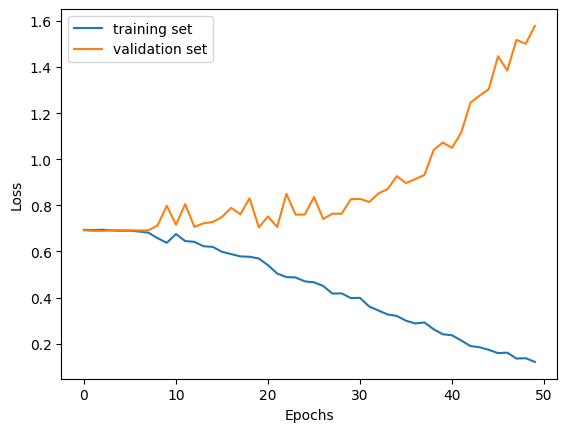

In [381]:
import matplotlib.pyplot as plt

x_epochs = [i for i in range(history.params['epochs'])]
plt.plot(x_epochs, history.history['loss'], x_epochs, history.history['val_loss'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Binary Accuracy')

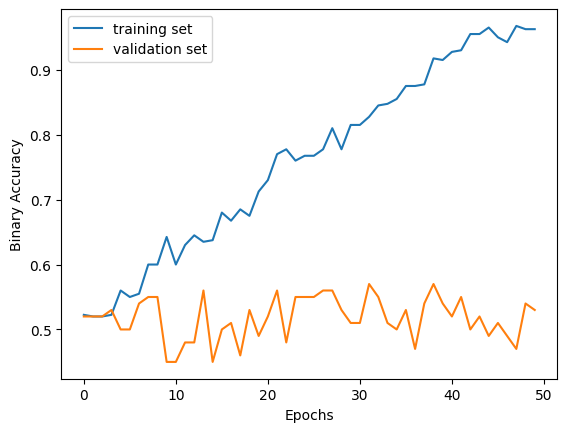

In [382]:
x_epochs = [i for i in range(history.params['epochs'])]
plt.plot(x_epochs, history.history['binary_accuracy'], x_epochs, history.history['val_binary_accuracy'])
plt.legend(['training set', 'validation set'])
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')

In [383]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss

def print_metrics(y_true, y_pred):
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred, average='micro', zero_division=0))
    print('Recall:', recall_score(y_true, y_pred, average='micro'))
    print('F1 Score:', f1_score(y_true, y_pred, average='micro'))
    print('Hamming Loss:', hamming_loss(y_true, y_pred))


In [384]:
y_train_pred = model.predict(x_train)
y_train_pred = np.where(y_train_pred > 0.5, 1, 0)
print_metrics(y_train, y_train_pred)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 847ms/step
Accuracy: 0.9375
Precision: 0.9842931937172775
Recall: 0.9842931937172775
F1 Score: 0.9842931937172775
Hamming Loss: 0.015


In [385]:
y_test_pred = model.predict(x_test)
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
print_metrics(y_test, y_test_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Accuracy: 0.0
Precision: 0.4528301886792453
Recall: 0.5714285714285714
F1 Score: 0.5052631578947369
Hamming Loss: 0.47
